## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Feb 13 15:14:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P8              11W /  60W |   2443MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [12]:
import os
import urllib.request
HOME = os.getcwd()
print(HOME)

d:\Research\VisualGeneration\Scripts\sam_weights


## Install Grounding DINO 🦕

In [3]:
# %cd {HOME}
# !git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
# %pip install -e .

d:\Research\VisualGeneration\Scripts\GroundingDINO


In [9]:
# CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinB_cfg.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

d:\Research\VisualGeneration\Scripts\sam_weights\GroundingDINO/groundingdino/config/GroundingDINO_SwinB_cfg.py ; exist: False


## Install Segment-Anything

In [4]:
# %cd {HOME}
# !git clone https://github.com/facebookresearch/segment-anything.git
# %cd {HOME}/segment-anything
# %pip install -e .

d:\Research\VisualGeneration\Scripts
d:\Research\VisualGeneration\Scripts\segment-anything


Cloning into 'segment-anything'...


Obtaining file:///D:/Research/VisualGeneration/Scripts/segment-anythingNote: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for segment-anything


## Download Grounding DINO Weights 🏋️

In [5]:
%cd {HOME}
!mkdir {HOME}\weights
%cd {HOME}/weights
WEIGHTS_FILE = os.path.join(HOME, "weights", 'groundingdino_swinb_cogcoor.pth')


# wget does not work
# !wget https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -o groundingdino_swint_ogc.pth
# !wget  https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha2/groundingdino_swinb_cogcoor.pth -o groundingdino_swinb_cogcoor.pth

# urllib.request.urlretrieve("https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha2/groundingdino_swinb_cogcoor.pth", WEIGHTS_FILE)

d:\Research\VisualGeneration\Scripts
d:\Research\VisualGeneration\Scripts\weights


A subdirectory or file d:\Research\VisualGeneration\Scripts\weights already exists.


In [10]:
WEIGHTS_NAME = "groundingdino_swinb_cogcoor.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

d:\Research\VisualGeneration\Scripts\sam_weights\weights\groundingdino_swinb_cogcoor.pth ; exist: False


## Download Segment-Anything Weights

In [7]:
# !mkdir {HOME}\sam_weights
# SAM_WEIGHTS = os.path.join(HOME, "sam_weights", 'sam_vit_h_4b8939.pth')

# urllib.request.urlretrieve("https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth", SAM_WEIGHTS)

('d:\\Research\\VisualGeneration\\Scripts\\sam_weights\\sam_weights\\sam_vit_h_4b8939.pth',
 <http.client.HTTPMessage at 0x22ef77f6430>)

## Load Grounding DINO Model

In [13]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate
model = load_model(CONFIG_PATH, WEIGHTS_PATH)

[WinError 2] The system cannot find the file specified: 'd:\\Research\\VisualGeneration\\Scripts\\sam_weights/GroundingDINO'
d:\Research\VisualGeneration\Scripts\sam_weights


FileNotFoundError: file "d:\Research\VisualGeneration\Scripts\sam_weights\GroundingDINO\groundingdino\config\GroundingDINO_SwinB_cfg.py" does not exist

## Object Detection with Grounding DINO

In [8]:
import matplotlib.pyplot as plt
import torch
import cv2
import time

In [19]:
# IMAGE_NAME = "HL_microwave_close.jpg"
IMAGE_NAME = "HL_temperature.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

image_source, image = load_image(IMAGE_PATH)
img_h = image_source.shape[0]
img_w = image_source.shape[1]

bottom center red up - arrow button: confidence 0.5446249842643738, box [375.0916442871094, 785.1629028320312, 267.4442443847656, 201.36077880859375]
bottom center red up arrow button: confidence 0.16093751788139343, box [424.119384765625, 517.1405639648438, 802.2308959960938, 1028.4053955078125]
bottom center red: confidence 0.13026076555252075, box [400.07037353515625, 405.71466064453125, 296.8711242675781, 417.1914367675781]
red up arrow button: confidence 0.13923734426498413, box [374.0472106933594, 726.8123168945312, 41.31963348388672, 28.204389572143555]
red up arrow button: confidence 0.1860497146844864, box [374.9574279785156, 785.1480712890625, 266.2135925292969, 200.05880737304688]


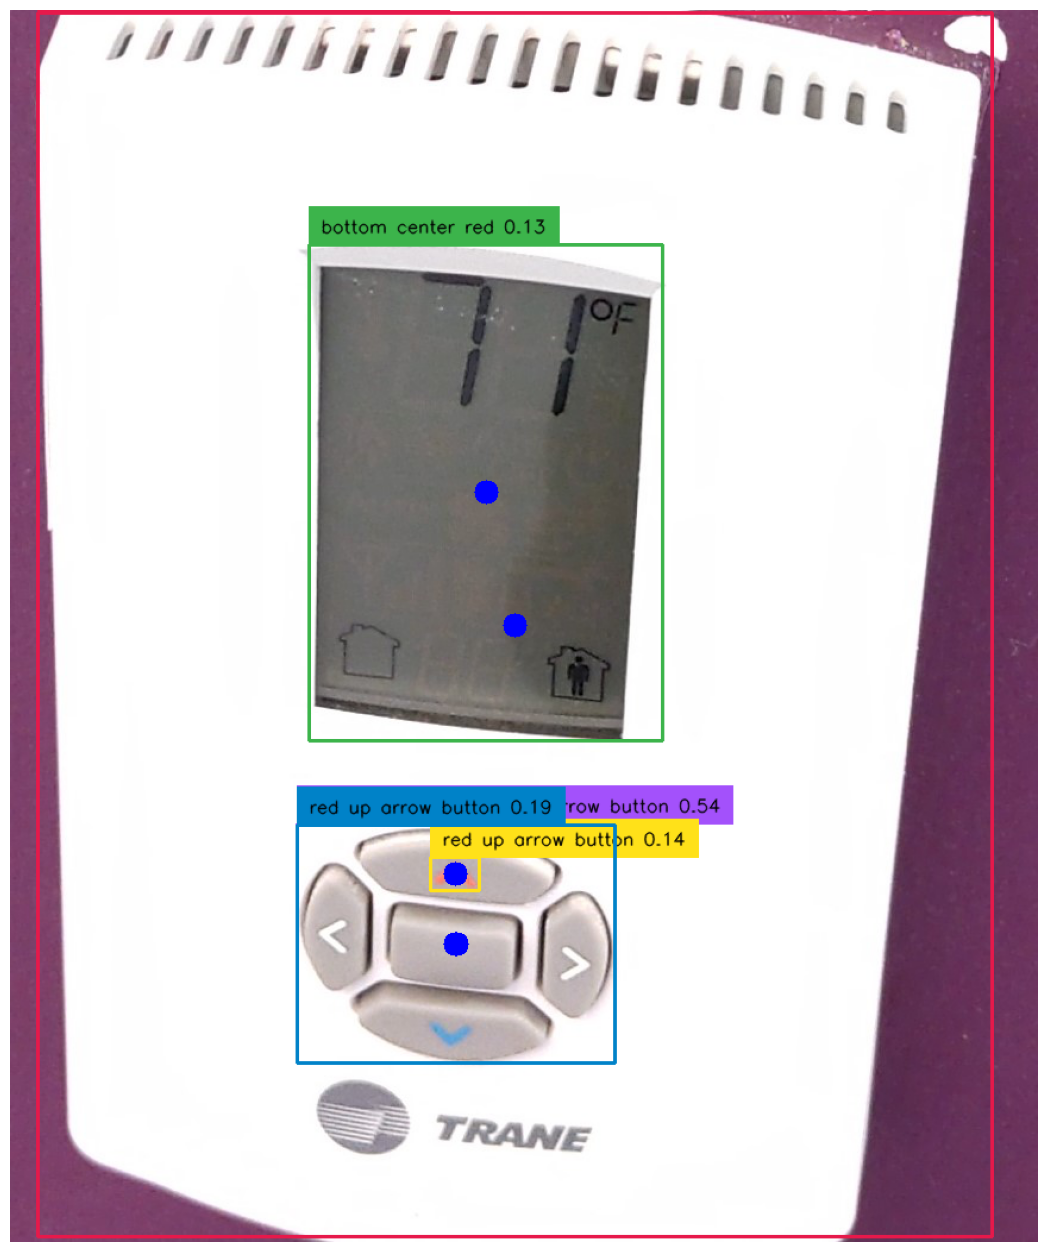

1.534377098083496 sec


In [20]:
begin = time.time()
# TEXT_PROMPT = "button"
# TEXT_PROMPT = "right side power button"
# TEXT_PROMPT = "center light switch"
TEXT_PROMPT = "bottom center red up-arrow button"
BOX_TRESHOLD = 0.1
TEXT_TRESHOLD = 0.1

# Tensor of found boxes (with confidence above box_threshold)
# Tensor of logits for text phrases
# List[str] of phrases from prompt found corresponding to boxes (with confidence above text_threshold)
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
# print(phrases)

# Get box coordinates
scale_fct = torch.Tensor([img_w, img_h, img_w, img_h])
boxes = boxes * scale_fct

if(boxes.numel() == 0):
   print('No objects detected.')
# Output details for each detection:
for result in zip(boxes, logits, phrases):
    print(f'{result[2]}: confidence {result[1]}, box {result[0].tolist()}')
# print(boxes)
# print(logits)
# print(phrases)

for box in boxes:
  # Draw blue circle as center of each box (0, 0) is top-left of image
  annotated_frame = cv2.circle(annotated_frame, (int(box[0]), int(box[1])), 10, (255, 0, 0), -1)

%matplotlib inline
# sv.plot_image(annotated_frame, (16, 16))
annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 16))
plt.imshow(annotated_frame)
plt.axis('off')
plt.show()
print(f'{time.time() - begin} sec')

## Segmentation with SAM

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    
